GBM LCs repository: /astrodata/romain/GBM_LC_repository/data/bn*********/LC/

In [3]:
################################################################################
# Import the libraries
################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GBM GRBs fluence catalogue: see Table 6 from von Kienlin et al. (2020) 

In [6]:
################################################################################
# Load the machine readable Table 6 from von Kienlin et al. (2020)
################################################################################

fermi_ids = []
t90s      = []
e_t90     = []


with open('./von_kienlin20_apj_table5.txt', 'r') as f:
    lines = f.readlines()[93:]
    for line in lines[:-1]:
        words = line.split()
        fermi_ids.append(words[0])
        try:
            t90s.append(float(words[2]))
            e_t90.append(float(words[3]))
        except ValueError:
            t90s.append(float(words[3]))
            e_t90.append(float(words[4]))


        
t90_dict = {'fermi_ids': fermi_ids, 'T90': t90s, 'Err_T90': e_t90}

t90_df = pd.DataFrame(fluence_dict)
t90_df

,fermi_ids,T90,Err_T90
0,bn080714086,5.376,2.360
1,bn080714425,40.192,1.145
2,bn080714745,59.649,11.276
3,bn080715950,7.872,0.272
4,bn080717543,36.609,2.985
...,...,...,...
2353,bn180701469,25.601,1.619
2354,bn180703876,20.736,1.557
2355,bn180703949,1.536,0.091
2356,bn180706351,38.144,1.145


In [7]:
################################################################################
# Select only long GRBs
################################################################################

long_df = t90_df[t90_df['T90'] >= 2.]
long_df

,fermi_ids,T90,Err_T90
0,bn080714086,5.376,2.360
1,bn080714425,40.192,1.145
2,bn080714745,59.649,11.276
3,bn080715950,7.872,0.272
4,bn080717543,36.609,2.985
...,...,...,...
2352,bn180630467,12.032,1.864
2353,bn180701469,25.601,1.619
2354,bn180703876,20.736,1.557
2356,bn180706351,38.144,1.145


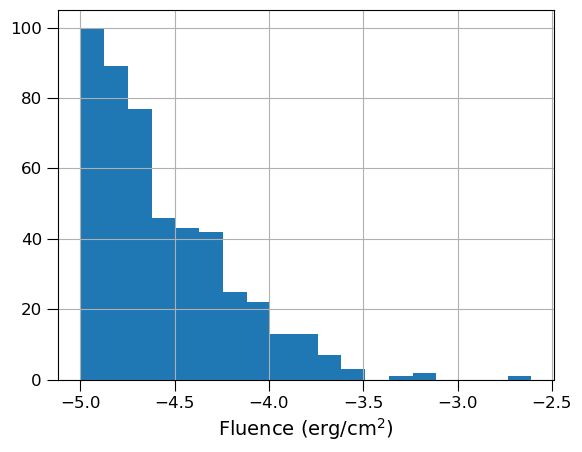

In [4]:
bright_fluences = bright_fluence_df['fluences']

################################################################################
# Plot the histogram of the fluences
################################################################################

fig, ax = plt.subplots(1, 1)
log_fluences = np.log10(bright_fluences)
log_bins = np.linspace(np.min(log_fluences), np.max(log_fluences), 20)
ax.hist(log_fluences, bins=log_bins)
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'Fluence (erg/cm$^2$)', size=14)
ax.grid(which='both')
plt.show()

In [9]:
################################################################################
# Save the list of selected Fermi IDs and fluences
################################################################################

with open('./bright_gbm_grbs.txt', 'w') as file:
    file.write('#%10s %8s\n' %('fermi_id', 'fluence'))
    for fermi_id, fluence in zip(bright_fluence_df['fermi_ids'], bright_fluence_df['fluences']):
        file.write('%11s %3.2e\n' %(fermi_id, fluence))

In [5]:
################################################################################
# LC selection
################################################################################

chosen_fermi_ids = np.loadtxt('./gbm_lcs/astrodata/romain/GBM_LC_repository/data/fermi_ids.txt', dtype=str)
units, starts, stops, counts = np.loadtxt('./gbm_lcs/astrodata/romain/GBM_LC_repository/data/fermi_id_time_count_list.txt', 
                                          usecols=(1, 2, 3, 4), unpack=True)

In [6]:
chosen_df = bright_fluence_df[bright_fluence_df['fermi_ids'].isin(chosen_fermi_ids)]
chosen_df

,fermi_ids,fluences,e_fluences
7,bn080723557,0.000072,2.540000e-07
9,bn080723985,0.000031,2.070000e-07
10,bn080724401,0.000016,5.040000e-08
13,bn080727964,0.000013,7.910000e-08
23,bn080806896,0.000013,1.940000e-07
...,...,...,...
2338,bn180612785,0.000016,5.770000e-08
2340,bn180615462,0.000015,1.780000e-07
2343,bn180618724,0.000019,5.270000e-08
2348,bn180623849,0.000020,3.400000e-08


In [8]:
chosen_fluences = chosen_df['fluences']
chosen_fluences

7       0.000072
9       0.000031
10      0.000016
13      0.000013
23      0.000013
          ...   
2338    0.000016
2340    0.000015
2343    0.000019
2348    0.000020
2354    0.000016
Name: fluences, Length: 459, dtype: float64

In [9]:
k = np.log10(chosen_fluences/counts)
k

7      -8.815059
9      -8.710936
10     -8.709810
13     -8.465878
23     -8.766167
          ...   
2338   -8.475040
2340   -8.175175
2343   -9.060399
2348   -8.564230
2354   -9.778027
Name: fluences, Length: 459, dtype: float64

In [10]:
np.savetxt("log10_fluence_over_counts_Fermi_GBM.txt", k)

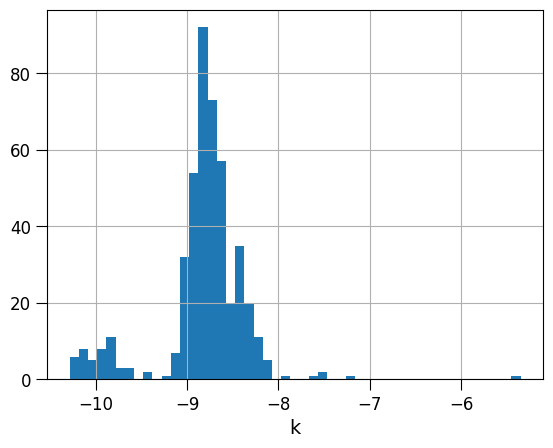

In [31]:
################################################################################
# Plot the histogram of the conversion factors
################################################################################

fig, ax = plt.subplots(1, 1)
log_bins = np.linspace(np.min(k), np.max(k), 50)
ax.hist(k, bins=log_bins)
ax.xaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.yaxis.set_tick_params(which='both', size=8, labelsize=12)
ax.set_xlabel(r'k', size=14)
ax.grid(which='both')
plt.show()

In [29]:
with open('./gbm_list.txt', 'w') as outfile:
    outfile.write('#%11s %12s %12s %12s %12s %12s %12s\n' % ('fermi_id', 'Units', 'T_start', 'T_stop', 'Counts', 'Fluence', 'k'))
    for fermi_id, unit, start, stop, count, fluence, factor in zip(fermi_ids, units, starts, stops, counts, chosen_fluences, k):
        outfile.write('%12s %12d %12.3f %12.3f %12.3f %12.2e, %12.5f\n' % (fermi_id, unit, start, stop, count, fluence, factor))